# Mod 6 Final Project

Jeremy Owens, Bridget Boakye

### Problem Statement:

We need to find Pulsars, know where to focus telescopes for Pulsar analysis

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, advanced_activations
from keras import initializers, regularizers
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils.np_utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.over_sampling import ADASYN

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

random_seed = 123

Using TensorFlow backend.


In [2]:
pulsar_df = pd.read_csv('pulsar_stars.csv')
pulsar_df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [3]:
for col in pulsar_df.columns:
    print(min(pulsar_df[col]), max(pulsar_df[col]))

5.8125 192.6171875
24.77204176 98.77891067
-1.876011181 8.069522046
-1.7918859809999999 68.10162173
0.213210702 223.39214049999998
7.370432165 110.64221059999998
-3.1392696110000005 34.53984419
-1.976975603 1191.0008369999998
0 1


In [4]:
pulsar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


### Code block for running scaled data

In [85]:
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']
features = X.columns

scalar = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed)  

X_train = scalar.fit_transform(X_train)

# X_val = scalar.transform(X_val)

X_test = scalar.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12528, 8) (5370, 8)
(12528,) (5370,)


In [86]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)
print(y_train_cat.shape, y_test_cat.shape)

(12528, 2) (5370, 2)


## Classic ML Test

In [7]:
def confusion_reporting(true_values, pred_values):
    print(confusion_matrix(true_values, pred_values))
    print(classification_report(true_values, pred_values))
    print('Accuracy score:', round(accuracy_score(true_values, pred_values), 4))

    cm = confusion_matrix(true_values, pred_values)
    df_cm = pd.DataFrame(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],
                         index=['F', 'T'],
                         columns=['F', 'T'])
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=True, cmap='Greens')
    plt.xlabel('Pred Val')
    plt.ylabel('True Val')
    plt.show()

In [8]:
def grid_search_classifier(clf, param_grid, X_train, X_test, y_train, y_test, scoring='f1_weighted'):
    grid_clf = GridSearchCV(clf, param_grid, scoring=scoring, n_jobs=-1)
    grid_clf.fit(X_train, y_train)

    best_parameters = grid_clf.best_params_

    print("Grid Search found the following optimal parameters: ")
    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))

    y_pred = grid_clf.predict(X_test)

    print()
    confusion_reporting(y_test, y_pred)
    return grid_clf

In [94]:
param_grid = {'max_depth': [5, 10, 15, 30],
              'max_features': [2, 5, 8],
              'n_estimators': [10, 25, 50, 100, 250]
             }

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
max_depth: 15
max_features: 5
n_estimators: 100

[[4818   42]
 [  75  435]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.91      0.85      0.88       510

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy score: 0.9782


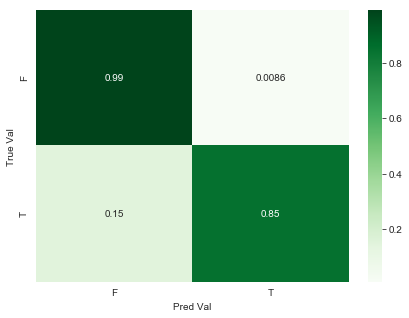

In [95]:
rf_grid_clf = grid_search_classifier(RandomForestClassifier(), param_grid, X_train, X_test, y_train, y_test)

## Baseline Model

In [96]:
model = Sequential()
model.add(Dense(2, activation = 'sigmoid'))

model.compile(optimizer= "sgd", loss='mse', metrics=['acc'])
base_model = model.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_data=(X_test, y_test_cat))

Train on 12528 samples, validate on 5370 samples
Epoch 1/10
12528/12528 [==============================] - 2s 165us/step - loss: 0.1693 - acc: 0.8163 - val_loss: 0.1453 - val_acc: 0.8655
Epoch 2/10
12528/12528 [==============================] - 1s 44us/step - loss: 0.1236 - acc: 0.9058 - val_loss: 0.1104 - val_acc: 0.9199
Epoch 3/10
12528/12528 [==============================] - 1s 40us/step - loss: 0.0957 - acc: 0.9401 - val_loss: 0.0884 - val_acc: 0.9438
Epoch 4/10
12528/12528 [==============================] - 1s 49us/step - loss: 0.0777 - acc: 0.9571 - val_loss: 0.0737 - val_acc: 0.9551
Epoch 5/10
12528/12528 [==============================] - 1s 43us/step - loss: 0.0655 - acc: 0.9676 - val_loss: 0.0636 - val_acc: 0.9633
Epoch 6/10
12528/12528 [==============================] - 1s 42us/step - loss: 0.0569 - acc: 0.9721 - val_loss: 0.0563 - val_acc: 0.9683
Epoch 7/10
12528/12528 [==============================] - 1s 57us/step - loss: 0.0507 - acc: 0.9741 - val_loss: 0.0510 - val_acc

## Improving the Model

In [97]:
model = Sequential()
model.add(Dense(100, input_dim=8))
model.add(advanced_activations.LeakyReLU(alpha=0.2))
model.add(Dense(100))
model.add(advanced_activations.LeakyReLU(alpha=0.2))
model.add(Dense(100))
model.add(advanced_activations.LeakyReLU(alpha=0.2))
model.add(Dense(2, activation = 'sigmoid'))


model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics=['acc'])
new_model = model.fit(X_train, y_train_cat, batch_size=32, epochs=30, 
                      validation_data=(X_test, y_test_cat))

Train on 12528 samples, validate on 5370 samples
Epoch 1/30
12528/12528 [==============================] - 2s 167us/step - loss: 0.3528 - acc: 0.9220 - val_loss: 0.1545 - val_acc: 0.9608
Epoch 2/30
12528/12528 [==============================] - 1s 85us/step - loss: 0.1107 - acc: 0.9707 - val_loss: 0.0997 - val_acc: 0.9699
Epoch 3/30
12528/12528 [==============================] - 1s 79us/step - loss: 0.0862 - acc: 0.9753 - val_loss: 0.0908 - val_acc: 0.9734
Epoch 4/30
12528/12528 [==============================] - 1s 100us/step - loss: 0.0805 - acc: 0.9771 - val_loss: 0.0877 - val_acc: 0.9736
Epoch 5/30
12528/12528 [==============================] - 1s 80us/step - loss: 0.0780 - acc: 0.9775 - val_loss: 0.0861 - val_acc: 0.9739
Epoch 6/30
12528/12528 [==============================] - 1s 73us/step - loss: 0.0765 - acc: 0.9782 - val_loss: 0.0850 - val_acc: 0.9745
Epoch 7/30
12528/12528 [==============================] - 1s 94us/step - loss: 0.0754 - acc: 0.9785 - val_loss: 0.0844 - val_ac

In [98]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07717518585264073
Test accuracy: 0.9777467411545624


## Stacked Ensemble Modeling

In [87]:
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_seed)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed)  

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

# X_val = scalar.transform(X_val)

X_test = scalar.transform(X_test)

X = scalar.transform(X)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16108, 8) (1790, 8)
(16108,) (1790,)


In [88]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)
print(y_train_cat.shape, y_test_cat.shape)

(16108, 2) (1790, 2)


### Random Forest

In [11]:
param_grid = {'max_depth': [5, 10, 15, 30],
              'max_features': [2, 5, 8],
              'n_estimators': [25, 50, 100, 250]
             }

Grid Search found the following optimal parameters: 
max_depth: 10
max_features: 5
n_estimators: 25

[[1606   15]
 [  28  141]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1621
           1       0.90      0.83      0.87       169

    accuracy                           0.98      1790
   macro avg       0.94      0.91      0.93      1790
weighted avg       0.98      0.98      0.98      1790

Accuracy score: 0.976


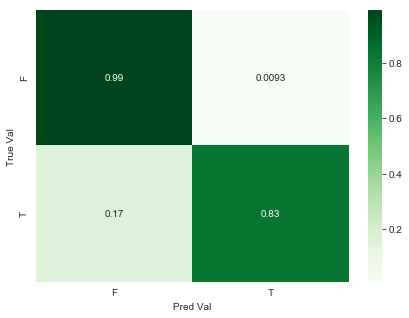

In [12]:
warnings.filterwarnings('ignore')

rf_grid_clf = grid_search_classifier(RandomForestClassifier(), param_grid, X_train, X_test, y_train, y_test)

In [13]:
rf_predict = rf_grid_clf.predict(X)
rf_predict.shape

(17898,)

### SVC

In [89]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability': [True],
              'C': [.01, .1, 1, 10, 100],
              'degree': [2, 3, 4],
              'shrinking': [True, False]
             }

In [ ]:
warnings.filterwarnings('ignore')

svc_grid_clf = grid_search_classifier(SVC(), param_grid, X_train, X_test, y_train, y_test)

In [ ]:
svc_predict = svc_grid_clf.predict(X)
svc_predict.shape

### KNN

In [17]:
param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': [3, 5, 8, 10, 15, 20]
             }

Grid Search found the following optimal parameters: 
n_neighbors: 5
weights: 'distance'

[[1609   12]
 [  33  136]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1621
           1       0.92      0.80      0.86       169

    accuracy                           0.97      1790
   macro avg       0.95      0.90      0.92      1790
weighted avg       0.97      0.97      0.97      1790

Accuracy score: 0.9749


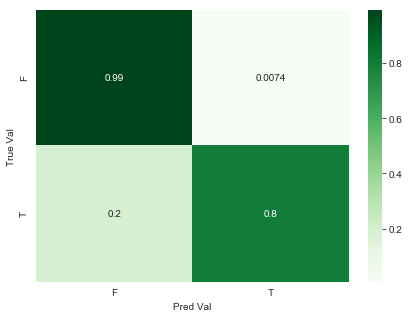

In [18]:
warnings.filterwarnings('ignore')

knn_grid_clf = grid_search_classifier(KNeighborsClassifier(), param_grid, X_train, X_test, y_train, y_test)

In [20]:
knn_predict = knn_grid_clf.predict(X)
knn_predict.shape

(17898,)

In [33]:
knn_predict

array([0, 0, 0, ..., 0, 0, 0])

### Neural Network

In [44]:
warnings.filterwarnings('ignore')

nn_model = Sequential()
nn_model.add(Dense(100, input_dim=8))
nn_model.add(advanced_activations.LeakyReLU(alpha=0.2))
nn_model.add(Dense(100))
nn_model.add(advanced_activations.LeakyReLU(alpha=0.2))
nn_model.add(Dense(100))
nn_model.add(advanced_activations.LeakyReLU(alpha=0.2))
nn_model.add(Dense(2, activation = 'sigmoid'))


nn_model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics=['acc'])
hist = nn_model.fit(X_train, y_train_cat, batch_size=32, epochs=30, 
                    validation_data=(X_test, y_test_cat))

Train on 16108 samples, validate on 1790 samples
Epoch 1/30
16108/16108 [==============================] - 1s 91us/step - loss: 0.2889 - acc: 0.9425 - val_loss: 0.1212 - val_acc: 0.9673
Epoch 2/30
16108/16108 [==============================] - 1s 50us/step - loss: 0.0951 - acc: 0.9741 - val_loss: 0.0949 - val_acc: 0.9709
Epoch 3/30
16108/16108 [==============================] - 1s 60us/step - loss: 0.0819 - acc: 0.9768 - val_loss: 0.0911 - val_acc: 0.9704
Epoch 4/30
16108/16108 [==============================] - 2s 105us/step - loss: 0.0784 - acc: 0.9771 - val_loss: 0.0895 - val_acc: 0.9715
Epoch 5/30
16108/16108 [==============================] - 1s 87us/step - loss: 0.0766 - acc: 0.9782 - val_loss: 0.0884 - val_acc: 0.9718
Epoch 6/30
16108/16108 [==============================] - 2s 102us/step - loss: 0.0754 - acc: 0.9782 - val_loss: 0.0876 - val_acc: 0.9721
Epoch 7/30
16108/16108 [==============================] - 2s 108us/step - loss: 0.0745 - acc: 0.9784 - val_loss: 0.0871 - val_a

In [67]:
nn_predict = nn_model.predict(X)
nn_predict_int = np.argmax(nn_predict, axis=1)
nn_predict_int.shape

(17898,)

In [78]:
stacked10_predict = pd.DataFrame({'rf': rf_predict, 'knn': knn_predict, 'nn': nn_predict_int, 'y': y.values})

In [80]:
stacked10_predict.head(20)

,rf,knn,nn,y
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


### Final Neural Network

In [81]:
X = stacked10_predict.drop('y', axis=1)
y = stacked10_predict['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [82]:
stacked_model = Sequential()
stacked_model.add(Dense(20, input_dim=3, activation='relu'))
# stacked_model.add(advanced_activations.LeakyReLU(alpha=0.2))
stacked_model.add(Dense(20, activation='relu'))
# stacked_model.add(advanced_activations.LeakyReLU(alpha=0.2))
stacked_model.add(Dense(2, activation = 'sigmoid'))


stacked_model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics=['acc'])
final_model = stacked_model.fit(X_train, y_train_cat, batch_size=32, epochs=30, 
                      validation_data=(X_test, y_test_cat))

Train on 14318 samples, validate on 3580 samples
Epoch 1/30
14318/14318 [==============================] - 1s 91us/step - loss: 0.4191 - acc: 0.9922 - val_loss: 0.2502 - val_acc: 0.9832
Epoch 2/30
14318/14318 [==============================] - 1s 48us/step - loss: 0.1527 - acc: 0.9920 - val_loss: 0.1155 - val_acc: 0.9831
Epoch 3/30
14318/14318 [==============================] - 1s 46us/step - loss: 0.0667 - acc: 0.9920 - val_loss: 0.0776 - val_acc: 0.9830
Epoch 4/30
14318/14318 [==============================] - 1s 51us/step - loss: 0.0378 - acc: 0.9913 - val_loss: 0.0663 - val_acc: 0.9832
Epoch 5/30
14318/14318 [==============================] - 1s 45us/step - loss: 0.0255 - acc: 0.9911 - val_loss: 0.0626 - val_acc: 0.9832
Epoch 6/30
14318/14318 [==============================] - 1s 44us/step - loss: 0.0187 - acc: 0.9950 - val_loss: 0.0615 - val_acc: 0.9877
Epoch 7/30
14318/14318 [==============================] - 1s 43us/step - loss: 0.0145 - acc: 0.9990 - val_loss: 0.0615 - val_acc:

In [84]:
score = stacked_model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07960841338548226
Test accuracy: 0.9874301675977654


# Working Zone

Random Forest

SVC

Neural Network

KNN



activation - leaky relu for interior, sigmoid for end

scaled data

hidden layers - 2

neurons in layers ~100

optimizer

dropout - no, too few predictors already

batch size - 32 works fine, lower doesn't really improve performance

epochs - usually converges by 30

PCA before run

Ovesampling (all the techniques)

In [45]:
y_train_hinged = y_train.apply(lambda x: -1 if x == 0 else 1)
y_val_hinged = y_val.apply(lambda x: -1 if x == 0 else 1)
y_test_hinged = y_test.apply(lambda x: -1 if x == 0 else 1)

y_train_hinged = y_train_hinged.values
y_val_hinged = y_val_hinged.values
y_test_hinged = y_test_hinged.values

### PCA

In [156]:
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']
features = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

scalar = StandardScaler()
X = scalar.fit_transform(X)

pca = PCA()
principalComponents_train = pca.fit_transform(X_train)
principalDftrain = pd.DataFrame(data=principalComponents_train)

In [157]:
pca2 = PCA()
principalComponents_test = pca2.fit_transform(X_test)
principalDftest = pd.DataFrame(data=principalComponents_test)

In [158]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

In [159]:
structure_loading_1 = eig_vectors[0]* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1.sort_values(ascending=False)

 Skewness of the DM-SNR curve                    105.445882
 Mean of the integrated profile                    4.212012
 Excess kurtosis of the DM-SNR curve               4.202441
 Standard deviation of the integrated profile      0.212644
 Excess kurtosis of the integrated profile        -0.252823
 Skewness of the integrated profile               -1.402322
 Mean of the DM-SNR curve                        -11.559083
 Standard deviation of the DM-SNR curve          -11.787078
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

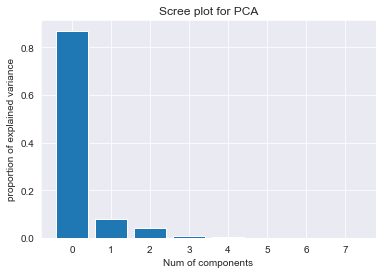

In [160]:
index = np.arange(len(features))
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'explained variance ratio')

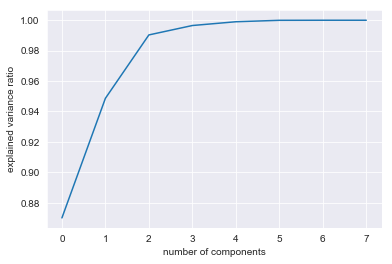

In [161]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')

In [162]:
principalDftrain.drop([3,4,5,6,7], axis=1, inplace=True)
principalDftest.drop([3,4,5,6,7], axis=1, inplace=True)
principalDftrain.head()
principalDftrain.shape

(14318, 3)

### Running Oversampled Data

In [38]:
print(y.value_counts()) #Previous original class distribution
smote = KMeansSMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0    16259
1     1639
Name: target_class, dtype: int64
1    13028
0    13027
dtype: int64


In [24]:
print(y.value_counts()) #Previous original class distribution
adasyn = ADASYN()
X_train_resampled, y_train_resampled = adasyn.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0    16259
1     1639
Name: target_class, dtype: int64
0    13027
1    12968
dtype: int64


### Code Block for running raw data

In [5]:
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']
features = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14318, 8) (3580, 8)
(14318,) (3580,)
